In [1]:
from sklearn.datasets import load_iris

In [ ]:
iris_dataset = load_iris()  # これでirisのdatasetをロードする

In [9]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
print(iris_dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
print(iris_dataset["target_names"])  # どのような分類先があるか

['setosa' 'versicolor' 'virginica']


In [ ]:
import numpy as np
print(np.unique(iris_dataset["target"]))  # 0, 1, 2という3つのラベルで表現されているs

[0 1 2]


In [ ]:
print(iris_dataset["feature_names"])  # どのような特徴があるか

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris_dataset["data"].shape)  # sepal length, sepal width, petal length, petal widthの4つがsetosa, versicolor, virginicaにそれぞれ50個ずつある

(150, 4)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"], test_size=0.3, random_state=0)

In [21]:
print(X_train.shape, X_test.shape)

(105, 4) (45, 4)


In [22]:
print(y_train.shape, y_test.shape)

(105,) (45,)


In [23]:
import pandas as pd

In [24]:
# scatter_matrixでプロットするためにpandasに変換する
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset["feature_names"])

In [26]:
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  105 non-null    float64
 1   sepal width (cm)   105 non-null    float64
 2   petal length (cm)  105 non-null    float64
 3   petal width (cm)   105 non-null    float64
dtypes: float64(4)
memory usage: 3.4 KB


In [27]:
import mglearn

In [ ]:
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker="o",
                        hist_kwds={"bins", 20}, s=60, alpha=0.8, cmap=mglearn.cm3)

In [31]:
iris_dataframe.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

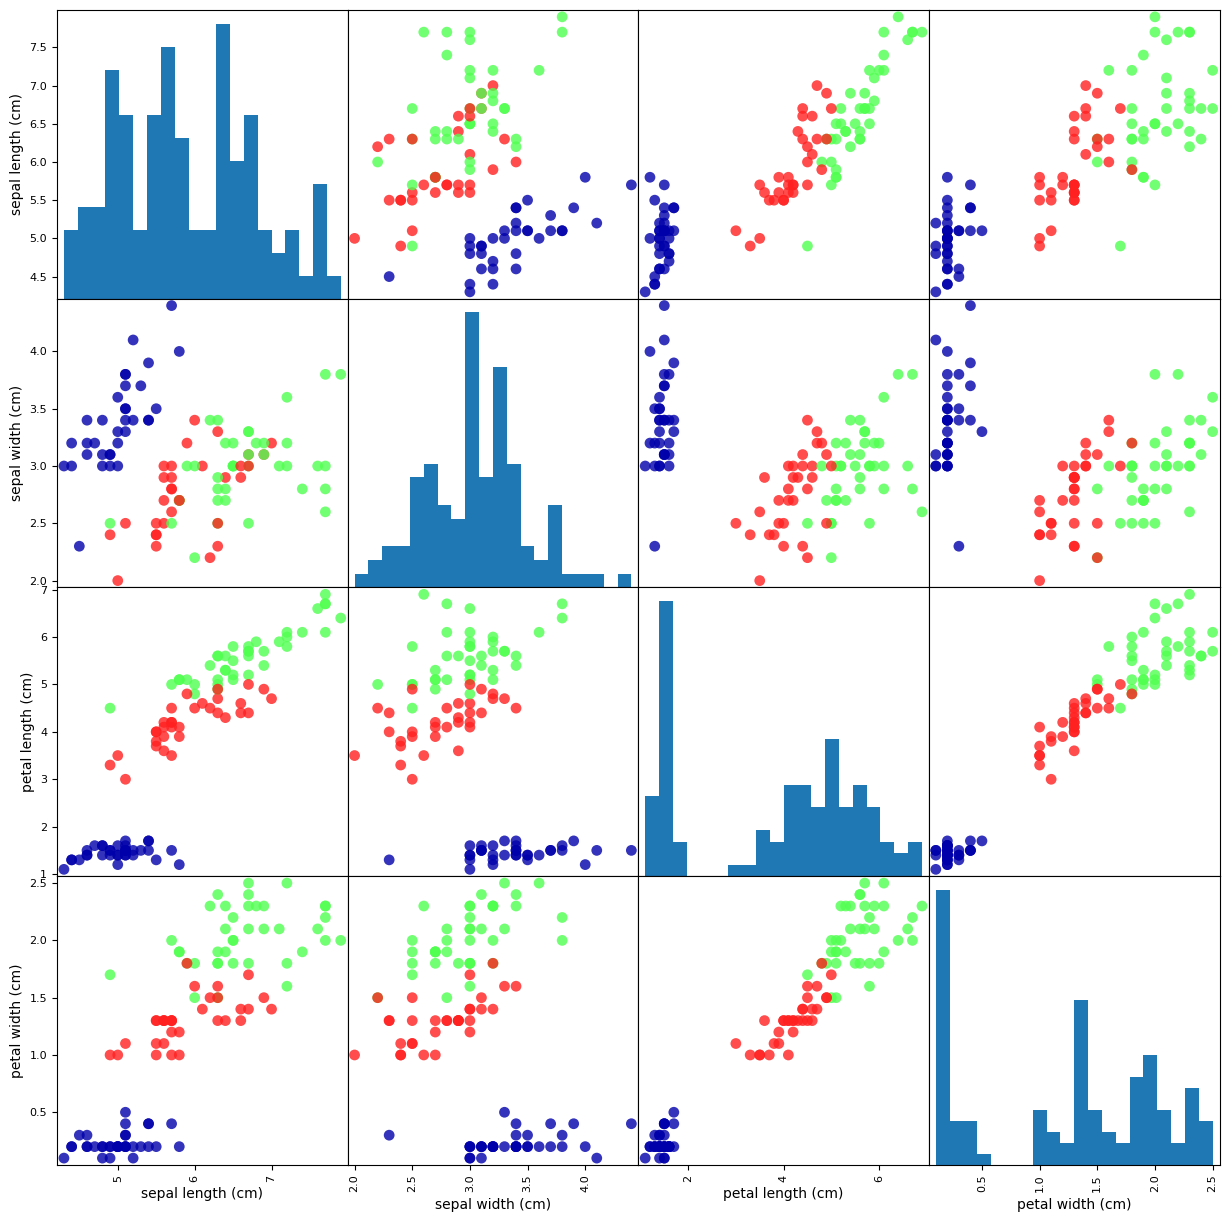

In [33]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker="o",
                           hist_kwds={"bins": 20}, s=60, alpha=0.8, cmap=mglearn.cm3)

In [34]:
import seaborn as sns

In [36]:
iris_dataframe.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [41]:
iris_dataframe["train_label"] = y_train

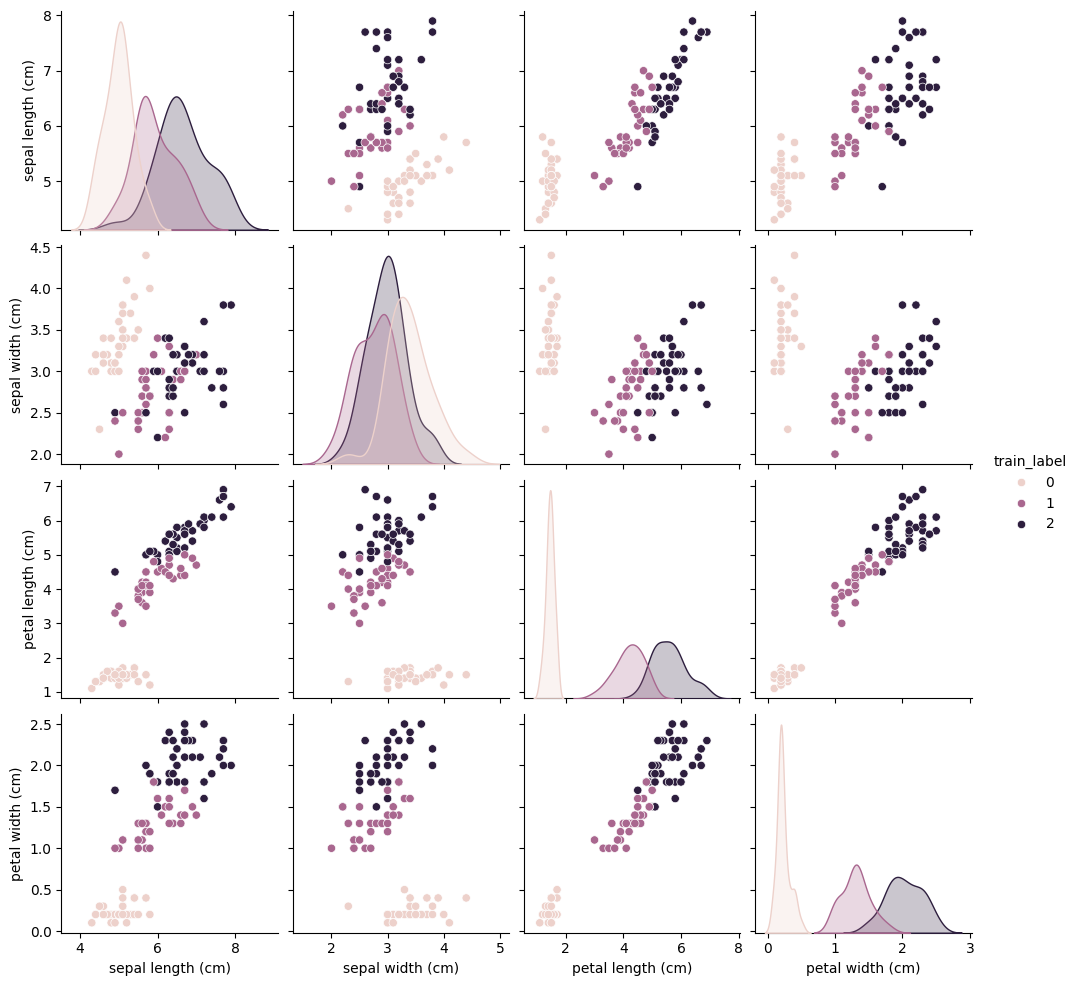

In [42]:
sns.pairplot(iris_dataframe, hue="train_label")

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
X_new = np.array([[5, 2.9, 1, 0.2]])  # ガクの長さが5cm, ガクの幅が2.9cm, 花弁の長さが1cm, 花弁の幅が0.2cmという新しいデータを作る

In [46]:
X_new.shape

(1, 4)

In [ ]:
pred = knn.predict(X_new)  # knn.predictが返すのは整数ラベルのためそれを変換してprintしている
print(f"Prediction: {pred}")
print(f"Predicted target name {iris_dataset["target_names"][pred]}")

Prediction: [0]
Predicted target name ['setosa']


In [48]:
y_pred = knn.predict(X_test)
print(f"Test set predictions: \n {y_pred}")

Test set predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [49]:
print(f"Test set accuracy {np.mean(y_pred == y_test):.4f}")

Test set accuracy 0.9778


In [50]:
print(f"Test set accuracy {knn.score(X_test, y_test):.4f}")

Test set accuracy 0.9778
